In [ ]:
!pip install torch torchvision torchaudio
!pip install easyocr
!pip install gmm

     |████████████████████████████████| 63.6 MB 1.2 MB/s 
     |████████████████████████████████| 47.7 MB 75 kB/s 
     |████████████████████████████████| 90 kB 5.1 MB/s 
  Created wheel for gmm: filename=GMM-0.3.3-py3-none-any.whl size=10951 sha256=dfa41362487d8da41aa06785ad3f1611396d228d55a05d695c38a7c121a6afee
  Stored in directory: /root/.cache/pip/wheels/26/a4/2a/54f04bc3e57be866525fdc8f04a9c83229c781bce539c560df
Successfully built gmm


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62 
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
import easyocr
#download the model
reader = easyocr.Reader(['tr','en'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches

1656 2339


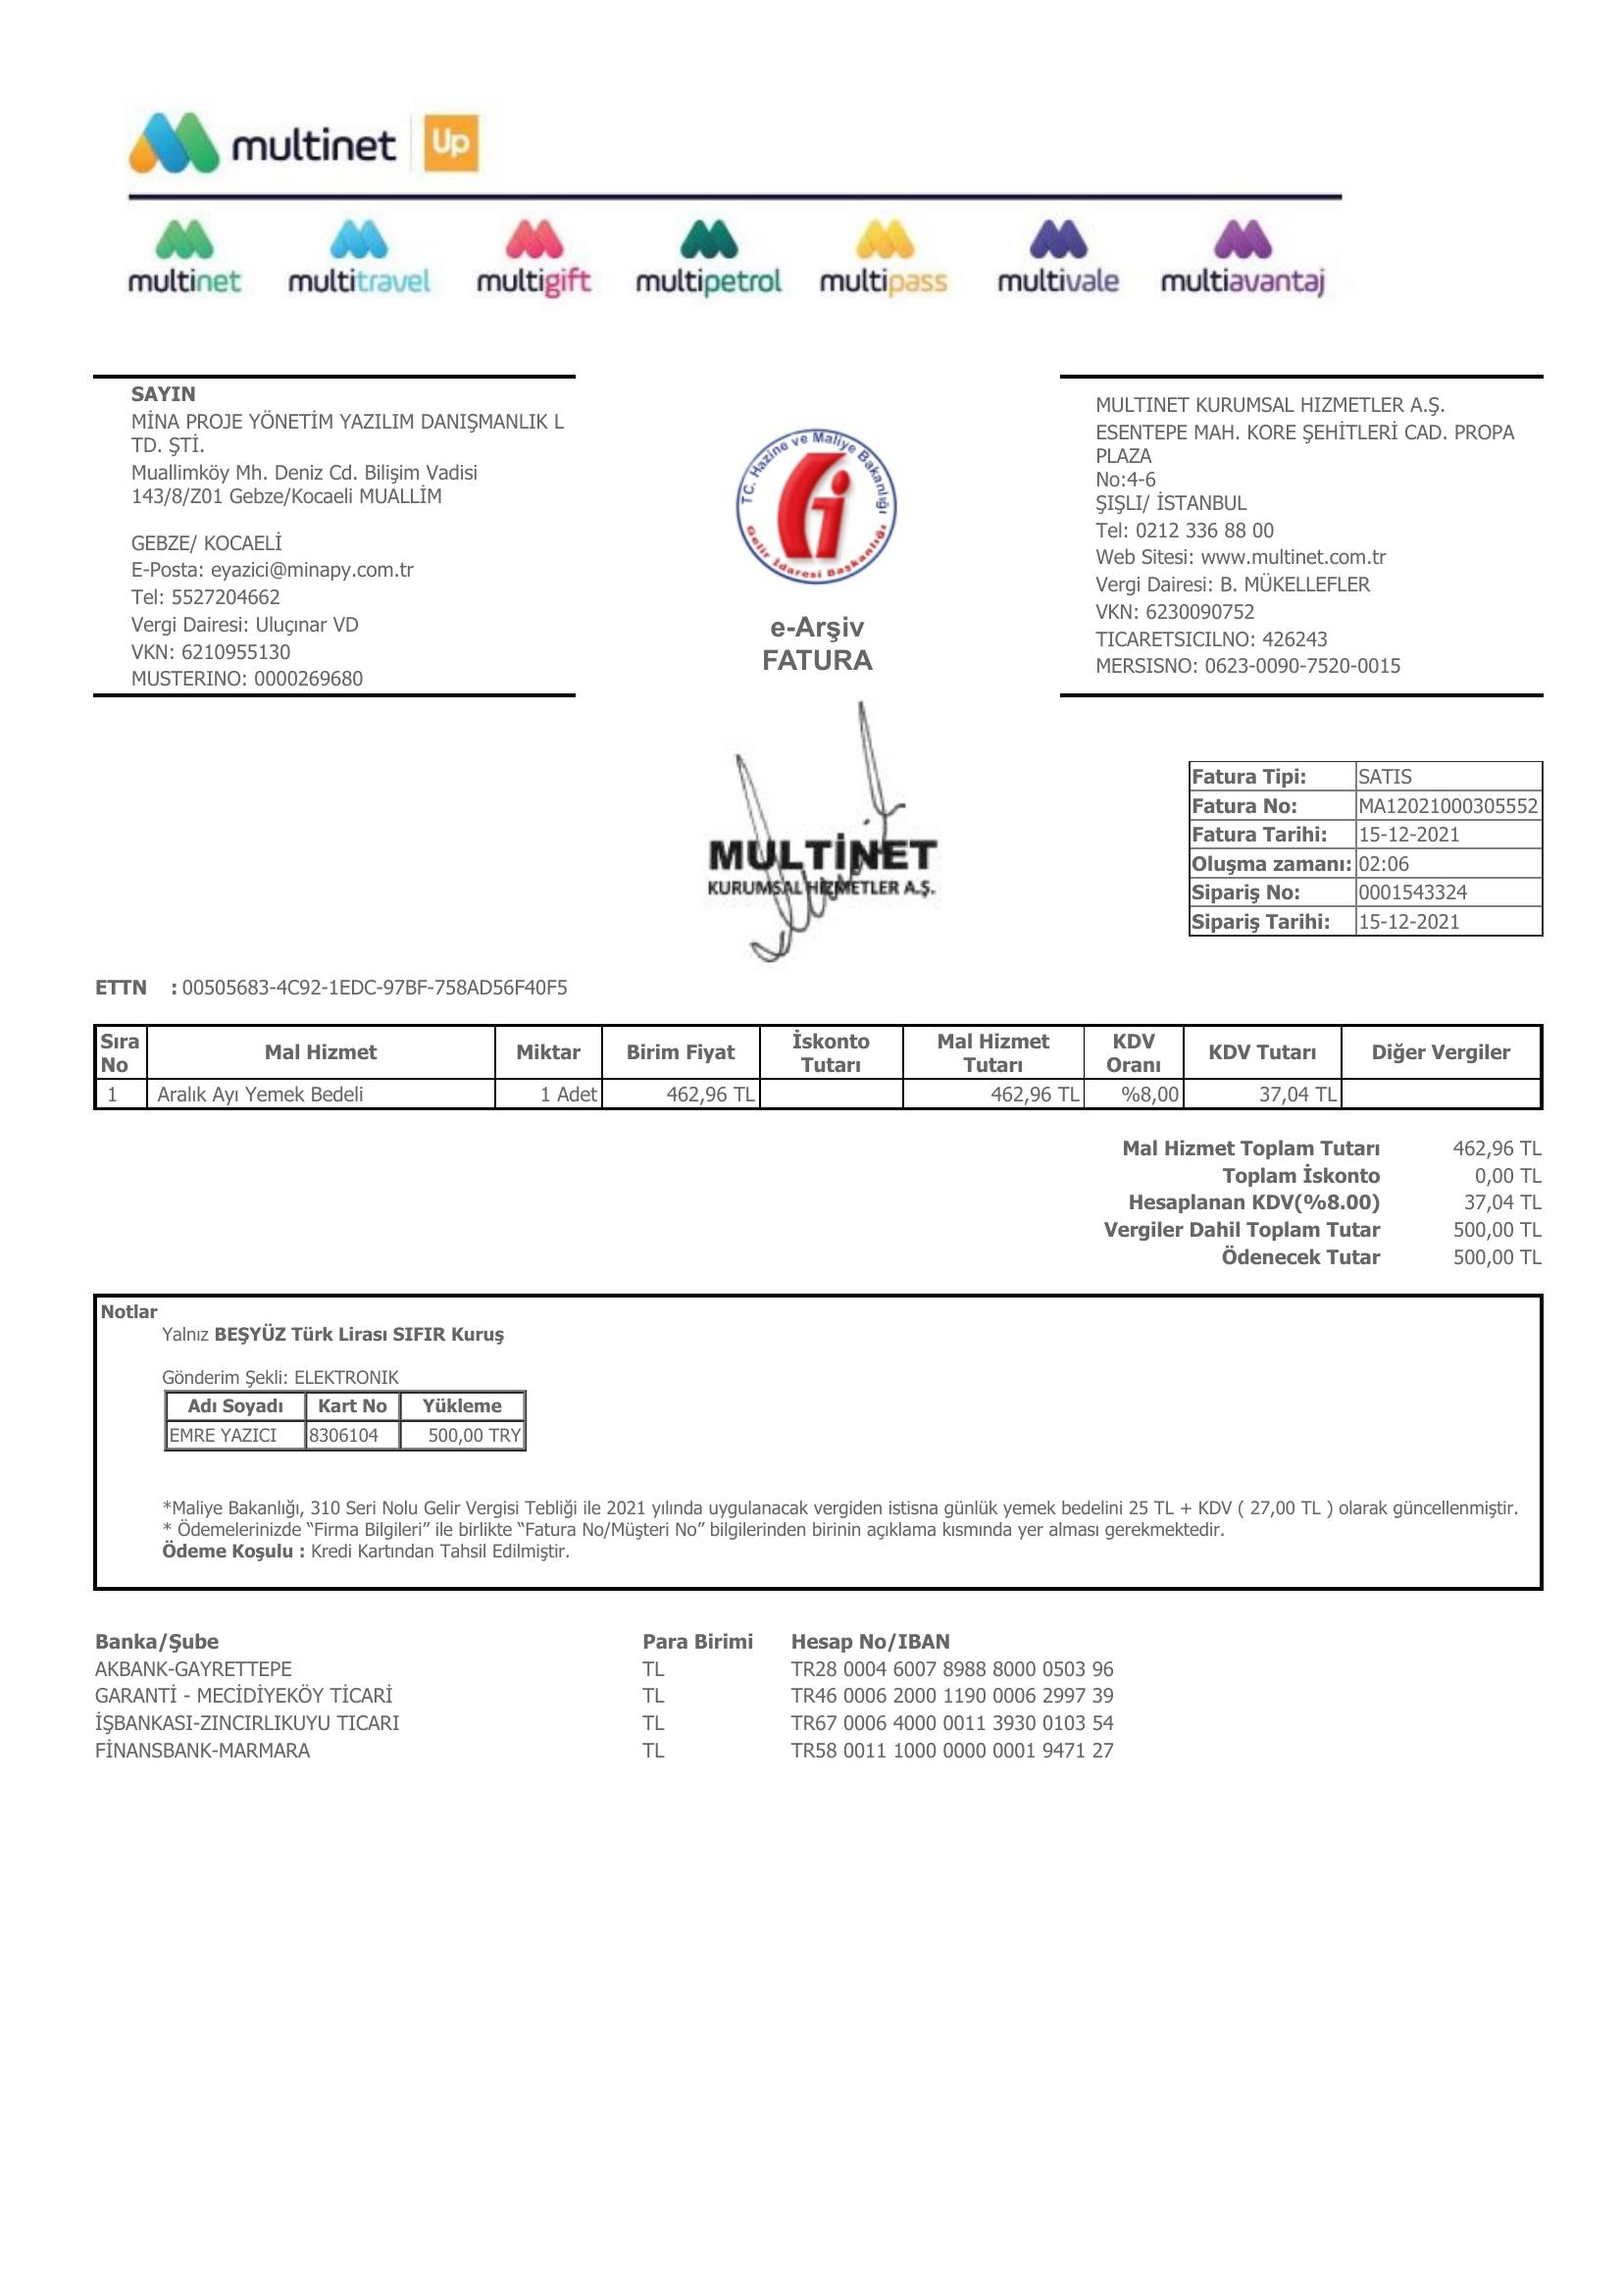

In [ ]:
# show an image
import PIL
import cv2
from PIL import ImageDraw
image_path='page3.jpg'
im = PIL.Image.open(image_path)
#im = PIL.Image.open("arial.ttf")
width,height=im.size

print(width,height)

im

In [ ]:
bounds=reader.readtext(image_path)
bounds

[([[231, 125], [411, 125], [411, 169], [231, 169]],
  'multinet',
  0.9984402311732409),
 ([[435, 127], [485, 127], [485, 165], [435, 165]], 'Uo', 0.8765321882097593),
 ([[127, 269], [253, 269], [253, 305], [127, 305]],
  'multinet',
  0.9980970360172974),
 ([[291, 269], [445, 269], [445, 305], [291, 305]],
  'multitravel',
  0.957949816164022),
 ([[482, 266], [610, 266], [610, 311], [482, 311]],
  'multigift',
  0.9986371720720738),
 ([[644, 268], [802, 268], [802, 308], [644, 308]],
  'multipetrol',
  0.9996631052827897),
 ([[831, 269], [973, 269], [973, 307], [831, 307]],
  'multipass',
  0.8363800393893766),
 ([[1013, 269], [1147, 269], [1147, 305], [1013, 305]],
  'multivale',
  0.9173402968457064),
 ([[1178, 267], [1359, 267], [1359, 307], [1178, 307]],
  'multiavantaj',
  0.6995404901038836),
 ([[130, 390], [202, 390], [202, 414], [130, 414]],
  'SAYIN',
  0.9999387975857175),
 ([[1116, 400], [1474, 400], [1474, 428], [1116, 428]],
  'MULTINET KURUMSAL HIZMETLER A.Ş.',
  0.71022

In [ ]:
points=[]
for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    arr=p0,p1,p2,p3
    points.append(arr)

points_arr=np.array(points)

list_of_points=points_arr.flatten()

len_bounds=len(bounds)



In [ ]:
list_new=list_of_points.reshape(len_bounds,8)
df=pd.DataFrame(list_new)

df

,0,1,2,3,4,5,6,7
0,231,125,411,125,411,169,231,169
1,435,127,485,127,485,165,435,165
2,127,269,253,269,253,305,127,305
3,291,269,445,269,445,305,291,305
4,482,266,610,266,610,311,482,311
...,...,...,...,...,...,...,...,...
102,652,1716,682,1716,682,1770,652,1770
103,804,1744,1138,1744,1138,1768,804,1768
104,94,1770,318,1770,318,1796,94,1796
105,652,1770,682,1770,682,1798,652,1798


  (0, 0)	231
  (0, 1)	125
  (0, 2)	411
  (0, 3)	125
  (0, 4)	411
  (0, 5)	169
  (0, 6)	231
  (0, 7)	169
  (1, 0)	435
  (1, 1)	127
  (1, 2)	485
  (1, 3)	127
  (1, 4)	485
  (1, 5)	165
  (1, 6)	435
  (1, 7)	165
  (2, 0)	127
  (2, 1)	269
  (2, 2)	253
  (2, 3)	269
  (2, 4)	253
  (2, 5)	305
  (2, 6)	127
  (2, 7)	305
  (3, 0)	291
  :	:
  (103, 7)	1768
  (104, 0)	94
  (104, 1)	1770
  (104, 2)	318
  (104, 3)	1770
  (104, 4)	318
  (104, 5)	1796
  (104, 6)	94
  (104, 7)	1796
  (105, 0)	652
  (105, 1)	1770
  (105, 2)	682
  (105, 3)	1770
  (105, 4)	682
  (105, 5)	1798
  (105, 6)	652
  (105, 7)	1798
  (106, 0)	804
  (106, 1)	1772
  (106, 2)	1138
  (106, 3)	1772
  (106, 4)	1138
  (106, 5)	1796
  (106, 6)	804
  (106, 7)	1796
[-1  0  1  2  3  4  5  6  7  8  9]


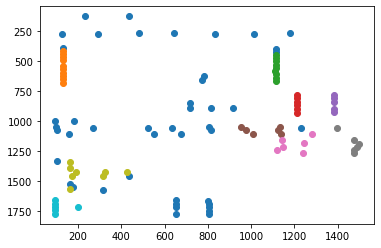

11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


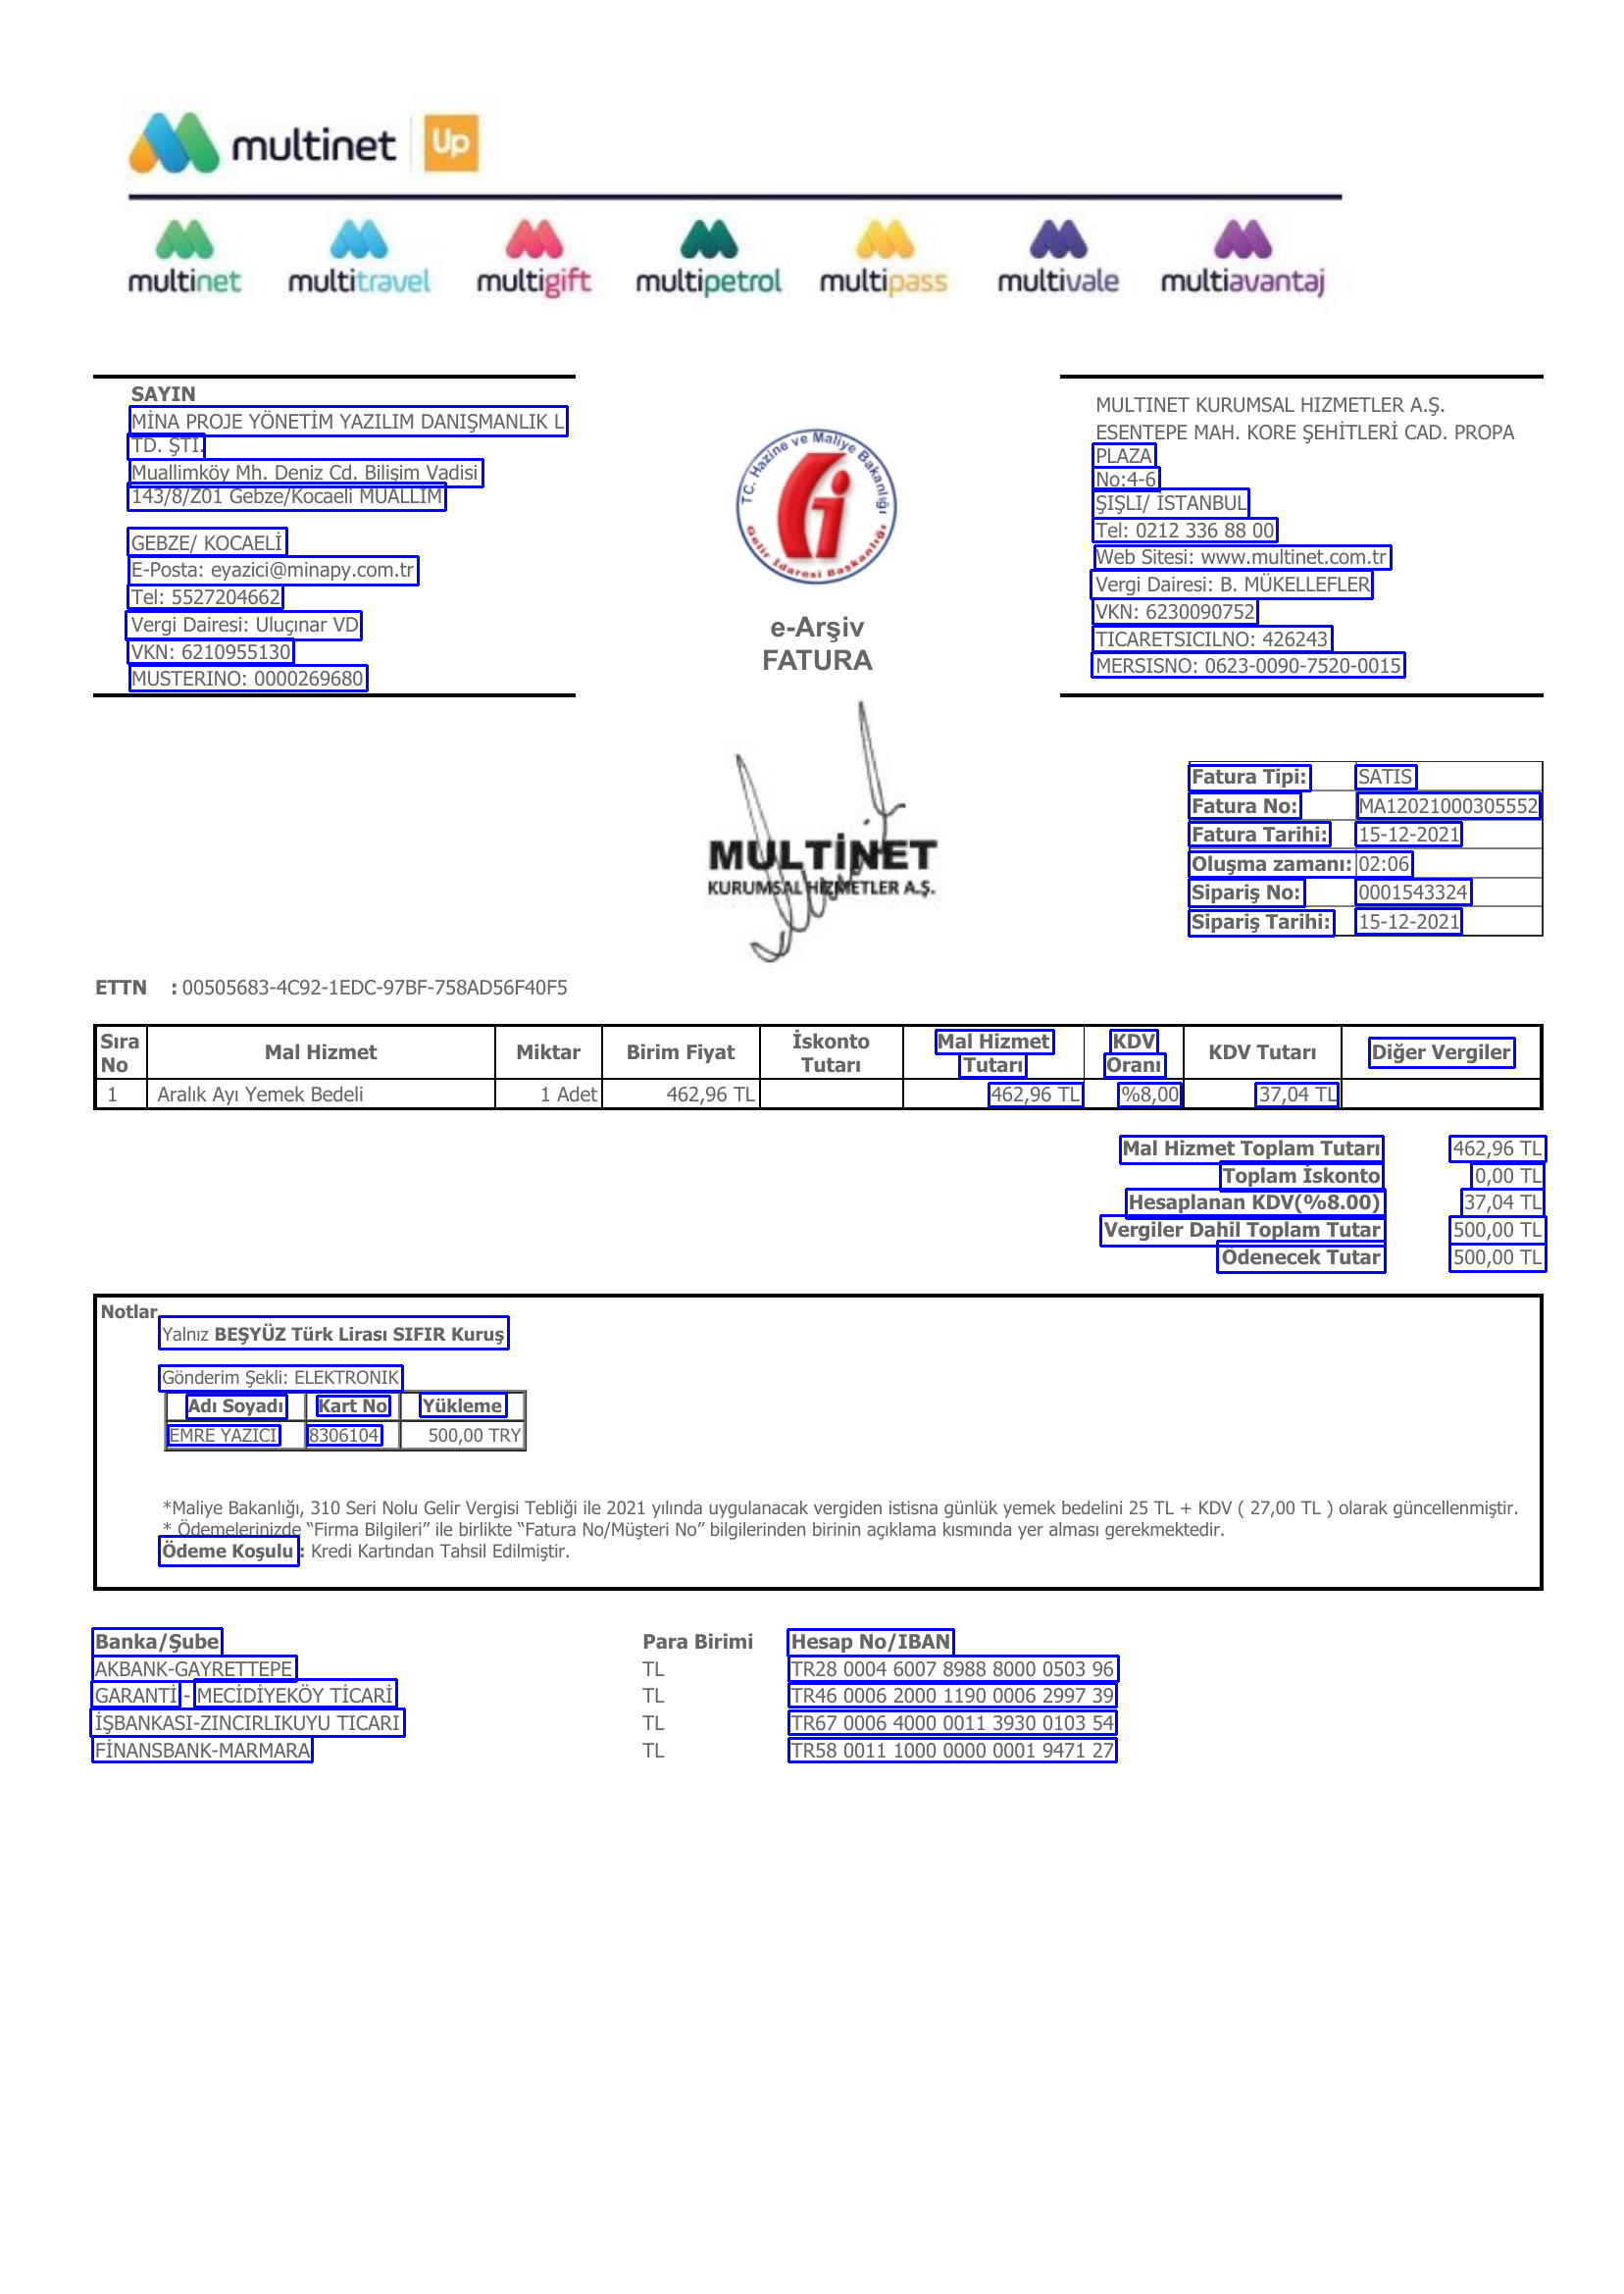

In [ ]:
from sklearn.cluster import DBSCAN
from google.colab.patches import cv2_imshow
from PIL import Image
from scipy.sparse import csr_matrix
image = cv2.imread(image_path)
X=np.array(df)
matrix=csr_matrix(X)
print(matrix)
db=DBSCAN(eps=250, min_samples=5).fit(X)
labels=db.labels_

u_labels = np.unique(labels)
print(u_labels)


for i in u_labels:
    plt.scatter(X[labels == i , 0] , X[labels == i , 1])

plt.gca().invert_yaxis()
plt.show()


db_cluster = pd.DataFrame(labels)
cluster_count=len(db_cluster.value_counts())

print(cluster_count)

label_points=[]
for i in range(0,cluster_count):
  points_of_cluster= X[labels==i,:]
  label_points.append(points_of_cluster)

arr_num=np.array(label_points)
arr_num=arr_num.flatten()

points_x1=[]
points_y1=[]
points_x2=[]
points_y2=[]
for i in range(0,len(arr_num)):
  for j in range(0,len(arr_num[i])):
    points_x1=arr_num[i][j][0].astype(int)
    points_y1=arr_num[i][j][1].astype(int)
    points_x2=arr_num[i][j][4].astype(int)
    points_y2=arr_num[i][j][5].astype(int)
    cv2.rectangle(image, (points_x1,points_y1), (points_x2,points_y2), (255,0,0), 2)

cv2_imshow(image)


[0 1 2 3 4 5 6]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


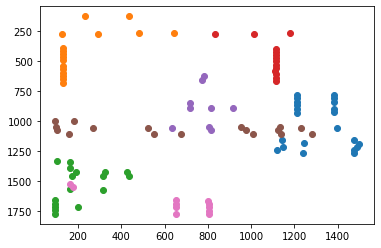

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


7


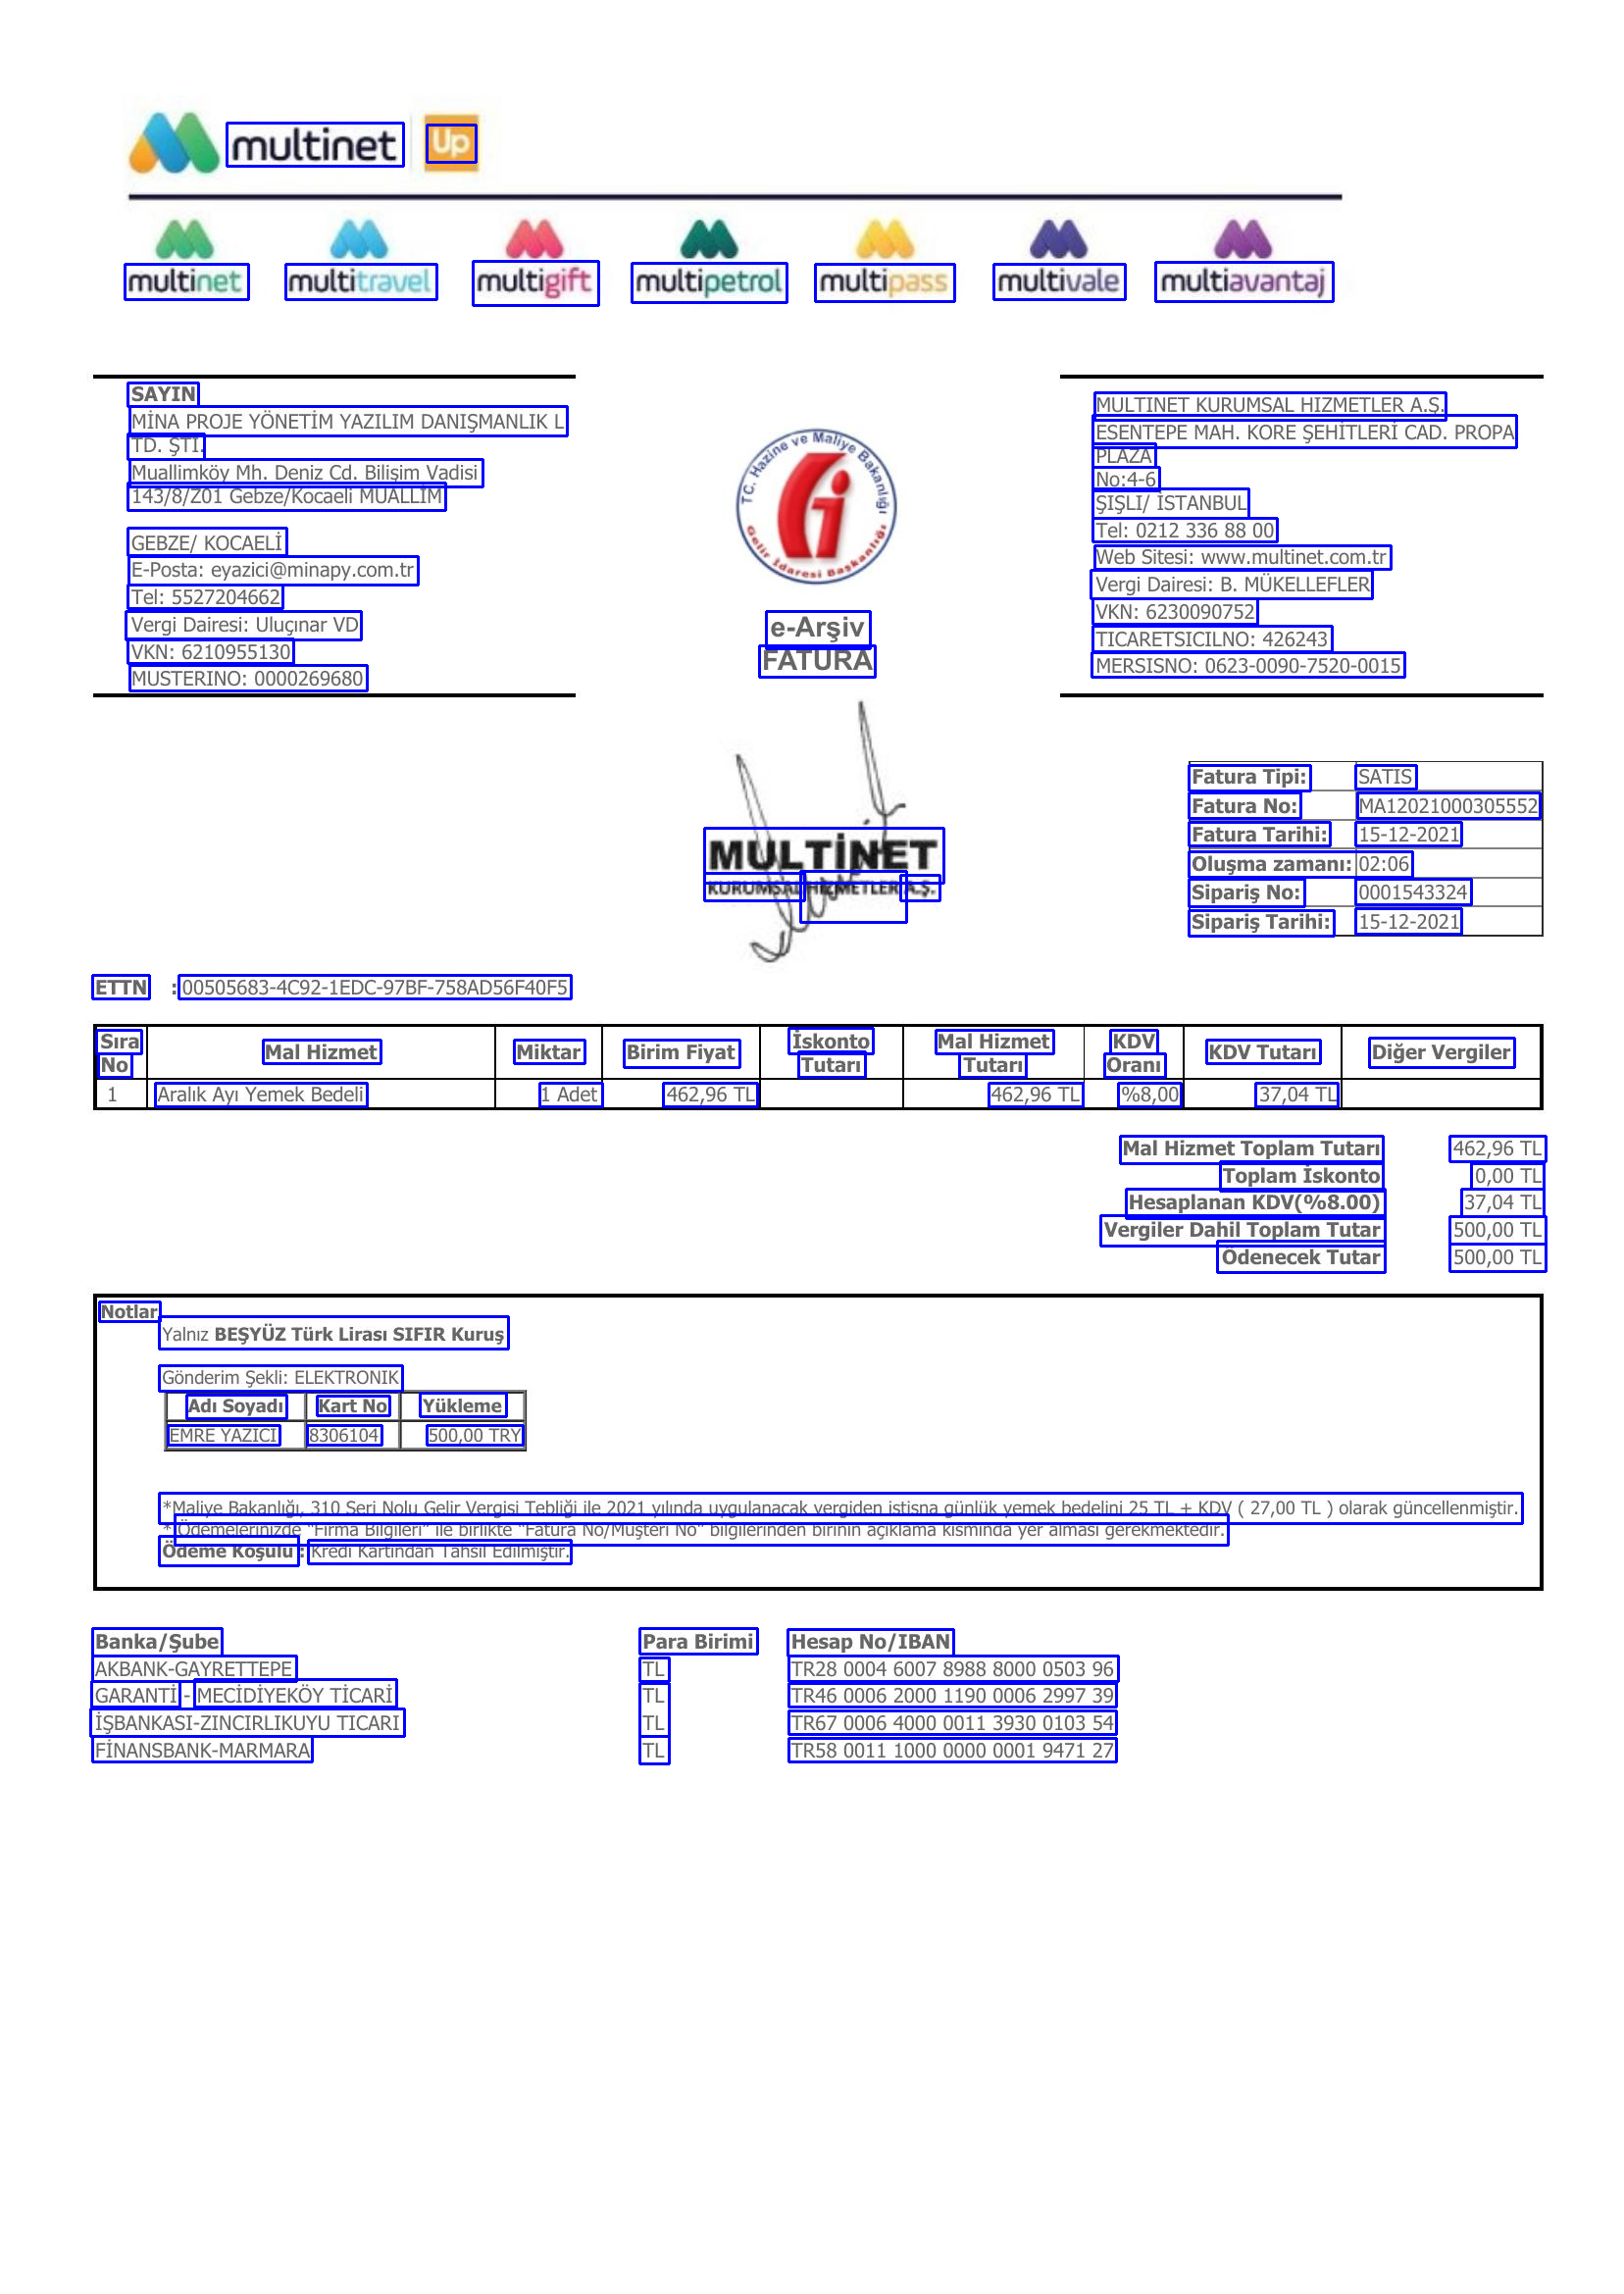

In [ ]:
from sklearn.mixture import GaussianMixture
matrix_gmm=csr_matrix(X)
matrix_gmm=matrix_gmm.todense()
gmm = GaussianMixture(n_components=7).fit(matrix_gmm)
label = gmm.predict(matrix_gmm)

u_labels = np.unique(label)
print(u_labels)

for i in u_labels:
    plt.scatter(X[label== i ,0] , X[label == i ,1])

plt.gca().invert_yaxis()
plt.show()


gmm_cluster = pd.DataFrame(label)
cluster_count=len(gmm_cluster.value_counts())

print(cluster_count)

label_points=[]
for i in range(0,cluster_count):
  points_of_cluster= X[label==i,:]
  label_points.append(points_of_cluster)

arr_num=np.array(label_points)
arr_num=arr_num.flatten()


points_x1=[]
points_y1=[]
points_x2=[]
points_y2=[]
for i in range(0,len(arr_num)):
  for j in range(0,len(arr_num[i])):
    points_x1=arr_num[i][j][0].astype(int)
    points_y1=arr_num[i][j][1].astype(int)
    points_x2=arr_num[i][j][4].astype(int)
    points_y2=arr_num[i][j][5].astype(int)
    cv2.rectangle(image, (points_x1,points_y1), (points_x2,points_y2), (255,0,0), 2)

cv2_imshow(image)